# Cancer Data Analysis - UAE Dataset
An exploratory data analysis (EDA) project on a simulated dataset of cancer patients in the United Arab Emirates (UAE).

## 1. Load and Explore the Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cancer_df = pd.read_csv('_cancer_dataset_uae.csv', keep_default_na=False, na_values=['', 'N/A'])

# Preview the dataset
print("Preview of Data:")
print(cancer_df.head())

# Data structure and types
print("\nDataset Info:")
print(cancer_df.info())

# Summary statistics
summary_stats = cancer_df.describe()
print("Summary Statistics:")
print(summary_stats)

Preview of Data:
  Patient_ID  Age  Gender Nationality        Emirate Diagnosis_Date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  Cancer_Type Cancer_Stage Treatment_Type Treatment_Start_Date  \
0       Liver           II      Radiation           2020-12-04   
1    Leukemia          III        Surgery           2015-11-05   
2       Liver          III      Radiation           2018-08-03   
3        Lung          III      Radiation           2022-03-13   
4  Pancreatic           II   Chemotherapy           2020-02-29   

                     Hospital Primary_Physician          Outcome Death_Date  \
0     Sheikh Khalifa Hospital          Dr. VO41        Recovered        NaN   
1

## 2. Data Cleaning
Standardize column names, handle missing values, and convert date fields.

In [5]:
# Unique values
print("\nUnique Values Per Column:")
print(cancer_df.nunique())

# Missing values
print("\nMissing Values:")
print(cancer_df.isnull().sum())

# Fill missing cause_of_death as 'Alive'
cancer_df['Cause_of_Death'] = cancer_df['Cause_of_Death'].fillna('Alive')

# Drop duplicates
duplicates_count = cancer_df.duplicated().sum()
print(f"\nDuplicates Found: {duplicates_count}")
cancer_df.drop_duplicates(inplace=True)

# Standardize column names
cancer_df.columns = cancer_df.columns.str.lower().str.replace(" ", "_")

# Convert date columns
for col in ['diagnosis_date', 'treatment_start_date', 'death_date']:
    cancer_df[col] = pd.to_datetime(cancer_df[col], errors='coerce')

# Check missing after cleaning
print("\nMissing Values After Cleaning:")
print(cancer_df.isnull().sum())


Unique Values Per Column:
Patient_ID              10000
Age                        72
Gender                      3
Nationality                 2
Emirate                     7
Diagnosis_Date           3151
Cancer_Type                 8
Cancer_Stage                4
Treatment_Type              4
Treatment_Start_Date     3250
Hospital                    4
Primary_Physician        8614
Outcome                     3
Death_Date                867
Cause_of_Death              2
Smoking_Status              3
Comorbidities               4
Ethnicity                   5
Weight                    102
Height                     72
dtype: int64

Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician       

## 3. Exploratory Data Analysis (EDA)
Generate descriptive statistics and explore distributions.

In [6]:
# Summary stats for numerical columns
numerical_summary = cancer_df[['age', 'weight', 'height']].describe()
print("Numerical Summary:")
print(numerical_summary)

# Categorical value counts with percentages
for col in cancer_df.select_dtypes(include='object').columns:
    if col in ['patient_id', 'primary_physician']:
        continue
    print(f"Value counts for '{col}':")
    value_counts = cancer_df[col].value_counts()
    percentages = cancer_df[col].value_counts(normalize=True) * 100
    for category in value_counts.index:
        print(f"{category}: {value_counts[category]} ({percentages[category]:.2f}%)")
    print("-" * 40)

# Correlation matrix
correlation_matrix = cancer_df[['age', 'weight', 'height']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Grouped summaries
avg_age_by_cancer = cancer_df.groupby('cancer_type')['age'].mean().sort_values(ascending=False)
print("\nAverage Age by Cancer Type:")
print(avg_age_by_cancer)

outcome_by_treatment = cancer_df.groupby('treatment_type')['outcome'].value_counts().unstack().fillna(0)
print("\nOutcome Distribution by Treatment Type:")
print(outcome_by_treatment)

Numerical Summary:
                age        weight        height
count  10000.000000  10000.000000  10000.000000
mean      53.539700     69.550000    169.347500
std       20.757324     14.933339     10.070118
min       18.000000     18.000000    131.000000
25%       36.000000     60.000000    163.000000
50%       53.000000     70.000000    169.000000
75%       72.000000     80.000000    176.000000
max       89.000000    122.000000    208.000000
Value counts for 'gender':
Female: 4985 (49.85%)
Male: 4827 (48.27%)
Other: 188 (1.88%)
----------------------------------------
Value counts for 'nationality':
Emirati: 5920 (59.20%)
Expatriate: 4080 (40.80%)
----------------------------------------
Value counts for 'emirate':
Ajman: 1497 (14.97%)
Fujairah: 1471 (14.71%)
Abu Dhabi: 1471 (14.71%)
Umm Al Quwain: 1432 (14.32%)
Dubai: 1407 (14.07%)
Sharjah: 1382 (13.82%)
Ras Al Khaimah: 1340 (13.40%)
----------------------------------------
Value counts for 'cancer_type':
Leukemia: 1314 (13.14%)


## 4. Data Visualization
Visualize distributions, relationships, and summaries using plots.

In [2]:
# Histogram - Age
plt.figure(figsize=(8, 5))
plt.hist(cancer_df['age'], bins=30, edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram - Height
plt.figure(figsize=(8, 5))
plt.hist(cancer_df['height'], bins=30, edgecolor='black')
plt.title('Distribution of Patient Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram - Weight
plt.figure(figsize=(8, 5))
plt.hist(cancer_df['weight'], bins=30, edgecolor='black')
plt.title('Distribution of Patient Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Bar chart - Average age by cancer type
plt.figure(figsize=(10, 6))
avg_age_by_cancer.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Age by Cancer Type')
plt.xlabel('Average Age')
plt.ylabel('Cancer Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Scatter plot - Weight vs Height
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cancer_df, x='height', y='weight', alpha=0.5)
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

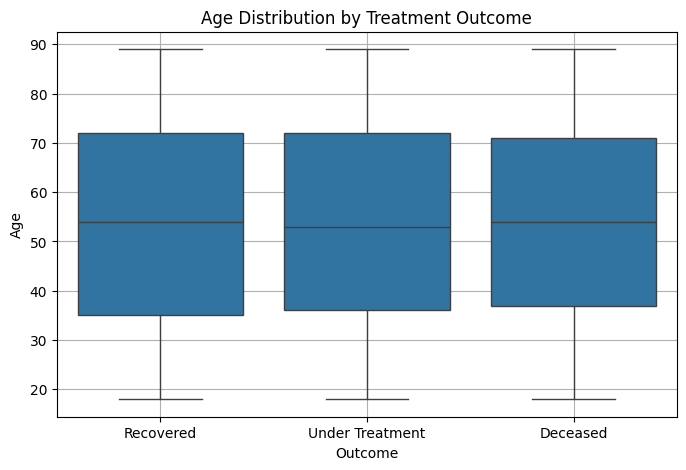

In [8]:
# Box plot - Age by Outcome
plt.figure(figsize=(8, 5))
sns.boxplot(data=cancer_df, x='outcome', y='age')
plt.title('Age Distribution by Treatment Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.grid(True)
plt.show()

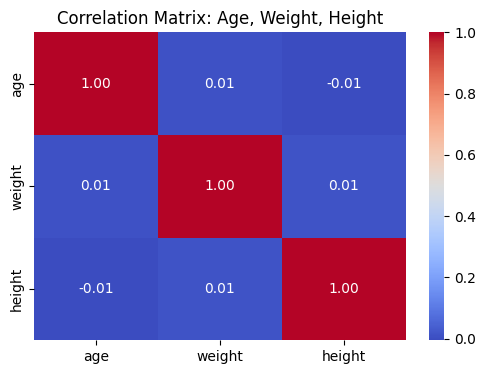

In [7]:
# Heatmap - Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cancer_df[['age', 'weight', 'height']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Age, Weight, Height')
plt.show()